In [1]:
%load_ext autoreload
%autoreload 2

In [4]:
import sys
sys.path.append('../..')

from vanilla_vae_celeba import VanillaVAE
from torchvision import transforms
from torch.utils.data import DataLoader
from torchvision.datasets import CelebA
from torchvision.utils import make_grid
import matplotlib.pyplot as plt

In [7]:
checkpoint_path = '../../lightning_logs/vanilla_vae_celeba/version_0/checkpoints/epoch=42-step=218697.ckpt'
model = VanillaVAE.load_from_checkpoint(checkpoint_path, in_channels=3, latent_dim=128)

In [9]:
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.CenterCrop(148),
    transforms.Resize(128),
    transforms.ToTensor()
])

val_dataset = CelebA(root='../../data', split='train', transform=transform, download=False)
val_loader = DataLoader(val_dataset, batch_size=32, num_workers=8, shuffle=True, drop_last=True)

In [10]:
test_image, test_label = next(iter(val_loader))
test_image.shape

torch.Size([32, 3, 128, 128])

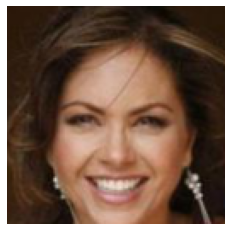

In [21]:
plt.imshow(test_image[0].permute(1, 2, 0))
plt.axis('off');

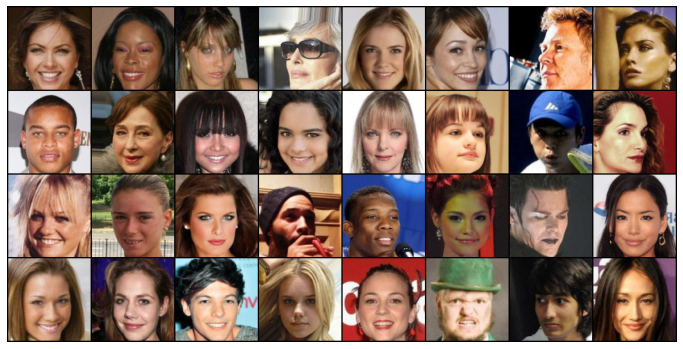

In [43]:
img = make_grid(test_image.data, normalize=False, nrow=8)
plt.figure(figsize=(12, 12))
plt.axis('off')
plt.imshow(img.permute(1, 2, 0));

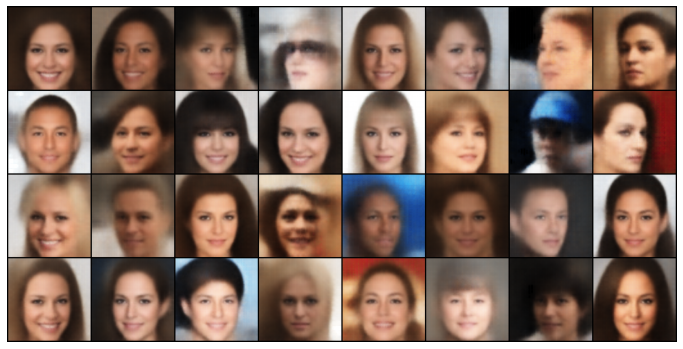

In [44]:
recon_image = model.reconstruct(test_image)
img = make_grid(recon_image.data, normalize=False, nrow=8)
plt.figure(figsize=(12, 12))
plt.axis('off')
plt.imshow(img.permute(1, 2, 0));

In [47]:
gen_image = model.sample(64)
gen_image.shape

torch.Size([64, 3, 128, 128])

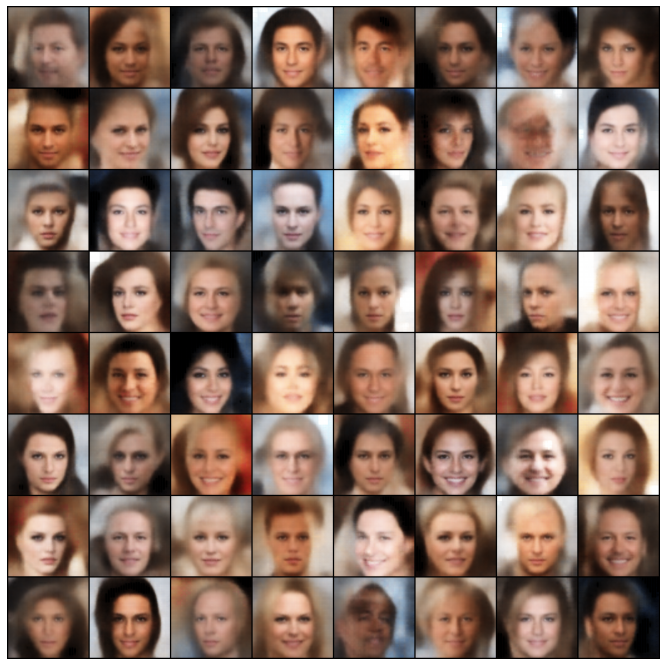

In [50]:
img = make_grid(gen_image.data, normalize=False, nrow=8)
plt.figure(figsize=(12, 12))
plt.axis('off')
plt.imshow(img.permute(1, 2, 0));